# Section 2.6 — Inventory of continuous distributions

This notebook contains all the code examples from **Section 2.6 Inventory of continuous distributions**
of the **No Bullshit Guide to Statistics**.


#### Notebook setup

In [1]:
# load Python modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (6,2)},
)

%config InlineBackend.figure_format = 'retina'

In [3]:
# simple float __repr__
np.set_printoptions(legacy='1.25')

In [4]:
# set random seed for repeatability
np.random.seed(42)

In [5]:
%pip install --quiet ministats

Note: you may need to restart the kernel to use updated packages.


In [6]:
from ministats import plot_pdf
from ministats import plot_cdf
from ministats import plot_pdf_and_cdf

## Uniform distribution

The [uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution) $\mathcal{U}(\alpha,\beta)$
is described by the following probability density function:

$$
  p_X(x) =
  \begin{cases}
      \frac{1}{\beta-\alpha}  & \textrm{for } \alpha \leq x \leq \beta, \\
      0                       & \textrm{for } x<0 \textrm{ or } x>1.
  \end{cases}
$$

For a uniform distribution $\mathcal{U}(\alpha,\beta)$,
each $x$ between $\alpha$ and $\beta$ is equally likely to occur,
and values of $x$ outside this range have zero probability of occurring.

In [7]:
from scipy.stats import uniform
alpha = 2
beta = 7
rvU = uniform(alpha, beta-alpha)

In [8]:
# draw 10 random samples from X
rvU.rvs(10)

array([3.87270059, 6.75357153, 5.65996971, 4.99329242, 2.7800932 ,
       2.7799726 , 2.29041806, 6.33088073, 5.00557506, 5.54036289])

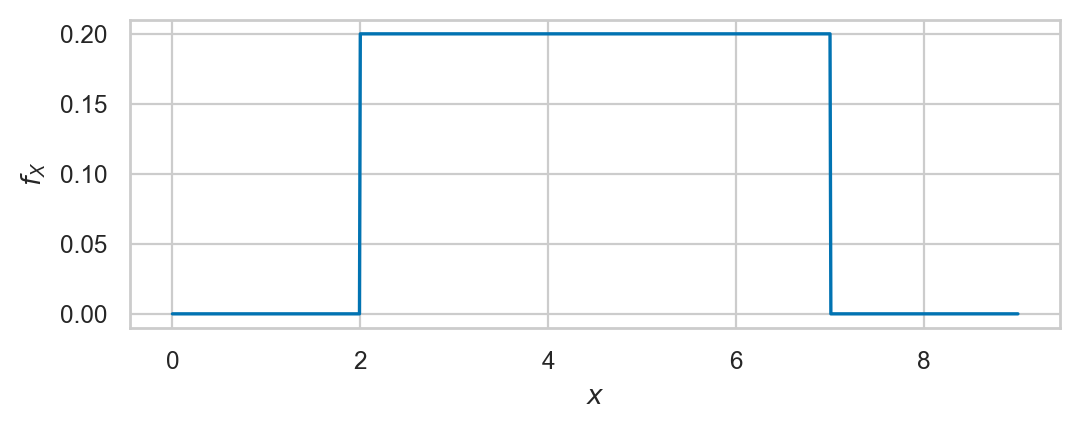

In [9]:
plot_pdf(rvU, xlims=[0,9]);

In [10]:
# # ALT. use sns.lineplot
# # plot the probability density function (pdf) of the random variable X
# xs = np.linspace(0, 10, 1000)
# fUs = rvU.pdf(xs)
# sns.lineplot(x=xs, y=fUs)

#### Cumulative distribution function

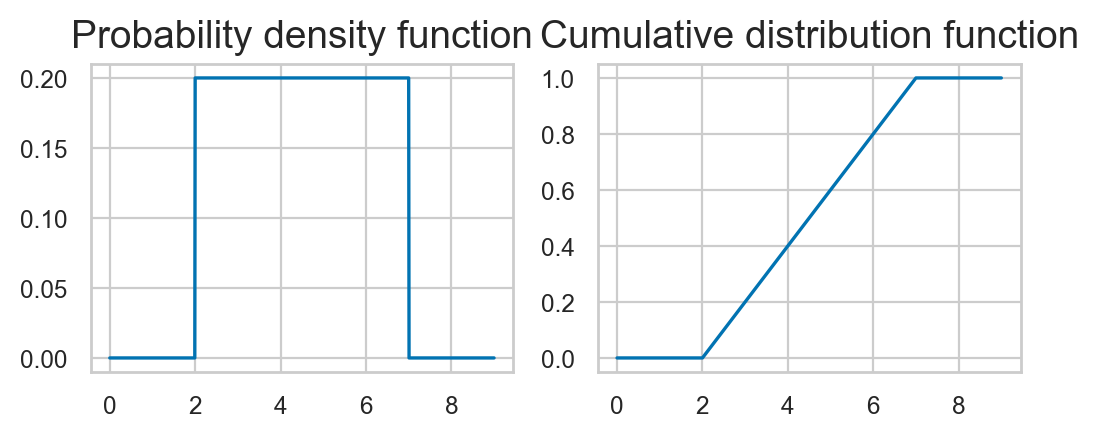

In [11]:
plot_pdf_and_cdf(rvU, xlims=[0,9]);

#### Standard uniform distribution

The standard uniform distribution $U_s \sim \mathcal{U}(0,1)$ is described by the following probability density function:

$$
  p_U(x) =
  \begin{cases}
      1 & \textrm{for } 0 \leq x \leq 1, \\
      0 & \textrm{for } x<0 \textrm{ or } x>1.
  \end{cases}
$$

where $U$ is the name of the random variable and $u$ are particular values it can take on.

The above equation describes tells you how likely it is to observe $\{U_s=x\}$.
For a uniform distribution $\mathcal{U}(0,1)$, each $x$ between 0 and 1 is equally likely to occur,
and values of $x$ outside this range have zero probability of occurring.

In [12]:
from scipy.stats import uniform

rvUs = uniform(0, 1)

In [13]:
# draw 10 random samples from X
rvUs.rvs(1)

array([0.02058449])

In [14]:
import random

random.seed(3)

In [15]:
random.random()

0.23796462709189137

In [16]:
random.uniform(0,1)

0.5442292252959519

In [17]:
import numpy as np
np.random.seed(42)
np.random.rand(10)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

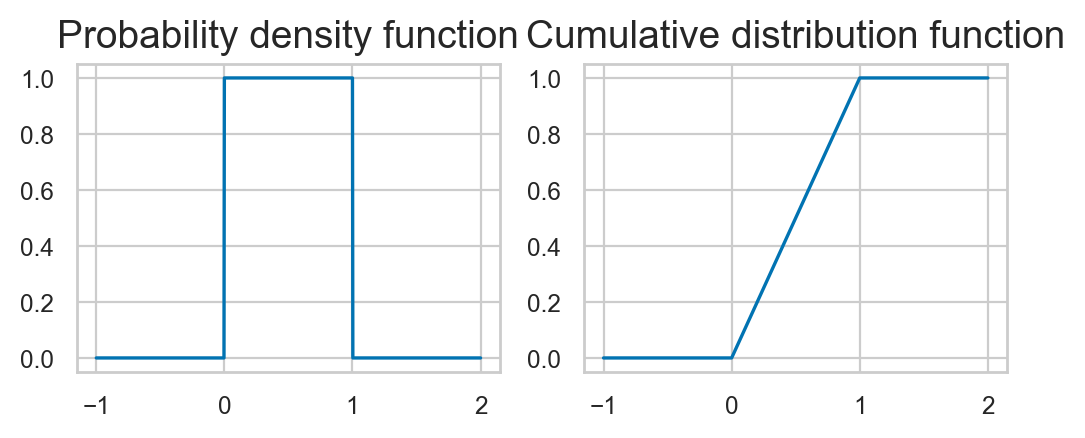

In [18]:
plot_pdf_and_cdf(rvUs, xlims=[-1,2]);

#### Simulating other random variables

We can use the uniform random variable to generate random variables from other distributions.
For example,
suppose we want to generate observations of a coin toss random variable
which comes out `heads` 50\% of the time and `tails` 50\% of the time.

We can use the standard uniform random variables obtained from `random.random()`
and split the outcomes at the "halfway point" of the sample space,
to generate the 50-50 randomness of a coin toss.
The function `flip_coin` defined below shows how to do this:

In [19]:
def flip_coin():
    u = random.random()  # random number in [0,1]
    if u < 0.5:
        return "heads"
    else:
        return "tails"

In [20]:
# simulate one coin toss
flip_coin()

'heads'

In [21]:
# simulate 10 coin tosses
[flip_coin() for i in range(0,10)]

['tails',
 'tails',
 'heads',
 'heads',
 'tails',
 'heads',
 'heads',
 'tails',
 'heads',
 'tails']

## Exponential distribution

In [22]:
from scipy.stats import expon

lam = 7
rvE = expon(loc=0, scale=1/lam)

To create the model `rvE`,
we had to specify a location parameter `loc`,
which we set to zero,
and a `scale` parameter,
which we set to the inverse of the rate parameter $\lambda = \texttt{lam}$.
The location parameter can be used to shift the exponential distribution to the right,
but we set `loc=0` to get the simple case that corresponds to the un-shifted distribution $\textrm{Expon}(\lambda)$.

In [23]:
rvE.mean(), rvE.var()

(0.14285714285714285, 0.02040816326530612)

In [24]:
# math formulas for mean and var
1/lam, 1/lam**2

(0.14285714285714285, 0.02040816326530612)

In [25]:
## ALT. we can obtain mean and ver using the .stats() method
##      The code below also computes the skewness and the kurtosis
# mean, var, skew, kurt = rvE.stats(moments='mvsk')
# mean, var, skew, kurt

In [26]:
# f_E(5) = pdf value at x=10
rvE.pdf(0.2)

1.7261787475912451

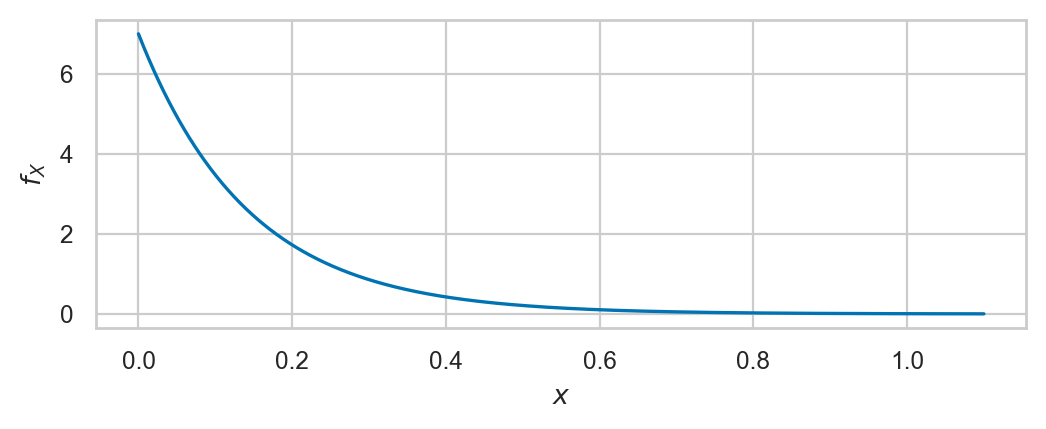

In [27]:
plot_pdf(rvE, xlims=[0,1.1]);

## Normal distribution

A random variable $N$ with a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) 
$\mathcal{N}(\mu,\sigma)$ is described by the probability density function:

$$
  f_N(x) = \tfrac{1}{\sigma\sqrt{2\pi}} e^{\small -\tfrac{(x-\mu)^2}{2\sigma^2}}.
$$

The mean $\mu$ and the standard deviation $\sigma$ are called the parameters of the distribution.
The math notation $\mathcal{N}(\mu, \sigma)$ is used to describe the whole family of normal probability distributions.


In [28]:
from scipy.stats import norm

mu = 10    # = 𝜇   where is the centre?
sigma = 3  # = 𝜎   how spread out is it?

rvN = norm(mu, sigma)

In [29]:
rvN.mean(), rvN.var()

(10.0, 9.0)

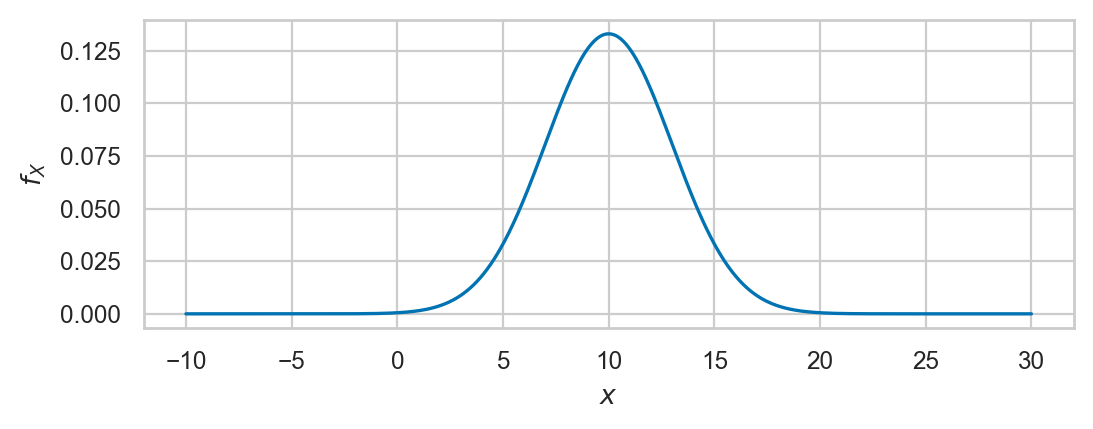

In [30]:
plot_pdf(rvN, xlims=[-10,30]);

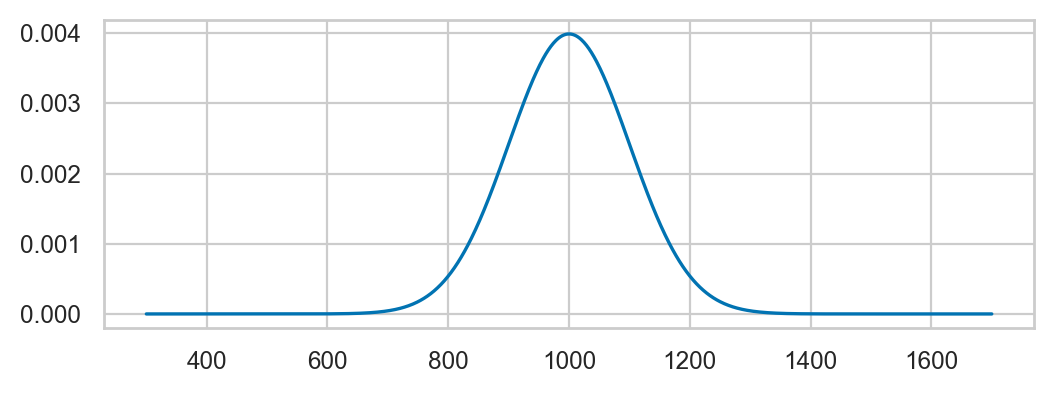

In [31]:
# ALT. generate the plot manually

# create a normal random variable
from scipy.stats import norm
mean = 1000   # 𝜇 (mu)    = where is its center?
std = 100     # 𝜎 (sigma) = how spread out is it?
rvN = norm(mean, std)

# plot its probability density function (pdf)
xs = np.linspace(300, 1700, 1000)
ys = rvN.pdf(xs)
ax = sns.lineplot(x=xs, y=ys)

## Standard normal distribution

A standard normal is denoted $Z$ with a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) 
$\mathcal{N}(\mu=0,\sigma=1)$ and described by the probability density function:

$$
    f_Z(z) = \tfrac{1}{\sqrt{2\pi}} e^{\small -\tfrac{z^2}{2}}.
$$


In [32]:
from scipy.stats import norm

rvZ = norm(0,1)

In [33]:
rvZ.mean(), rvZ.var()

(0.0, 1.0)

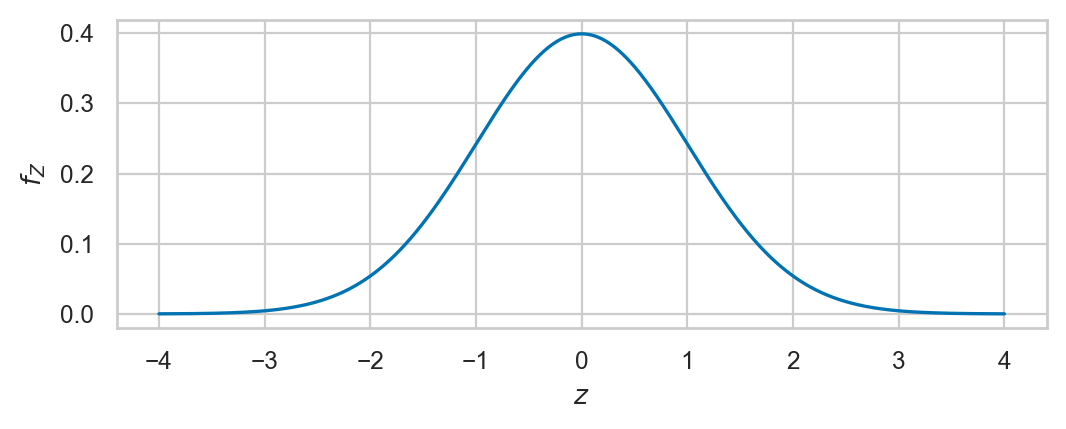

In [34]:
plot_pdf(rvZ, xlims=[-4,4], rv_name="Z");

#### Cumulative probabilities in the tails

Probability of $Z$ being smaller than $-2.2$.

In [35]:
rvZ.cdf(-2.3)

0.01072411002167581

Probability of $Z$ being greater than $2.2$.

In [36]:
1 - rvZ.cdf(2.3)

0.010724110021675837

Probability of $|Z| > 2.2$.

In [37]:
rvZ.cdf(-2.3) + (1-rvZ.cdf(2.3))

0.021448220043351646

In [38]:
norm.cdf(-2.3,0,1) + (1-norm.cdf(2.3,0,1))

0.021448220043351646

#### Inverse cumulative distribution calculations

In [39]:
rvZ.ppf(0.05)

-1.6448536269514729

In [40]:
rvZ.ppf(0.95)

1.644853626951472

In [41]:
rvZ.interval(0.9)

(-1.6448536269514729, 1.644853626951472)

## Mathematical interlude: the gamma function

### Gamma function

In [42]:
from math import factorial
from scipy.special import gamma as gammaf

gammaf(1), factorial(0) # = 0! = 1

(1.0, 1)

In [43]:
gammaf(2), factorial(1)  # = 1! = 1

(1.0, 1)

In [44]:
gammaf(3), factorial(2)  # = 2! = 2*1

(2.0, 2)

In [45]:
gammaf(4), factorial(3)  # = 3! = 3*2*1

(6.0, 6)

In [46]:
gammaf(5), factorial(4)  # = 4! = 4*3*2*1

(24.0, 24)

In [47]:
gammaf(5.1)

27.93175373836837

In [48]:
factorial(4.1)

TypeError: 'float' object cannot be interpreted as an integer

In [49]:
[gammaf(x) for x in [5, 5.1, 5.2, 5.5, 5.8, 5.9, 6]]

[24.0,
 27.93175373836837,
 32.578096050331354,
 52.34277778455352,
 85.6217375127053,
 101.27019121310353,
 120.0]

Text(0, 0.5, '$\\Gamma$')

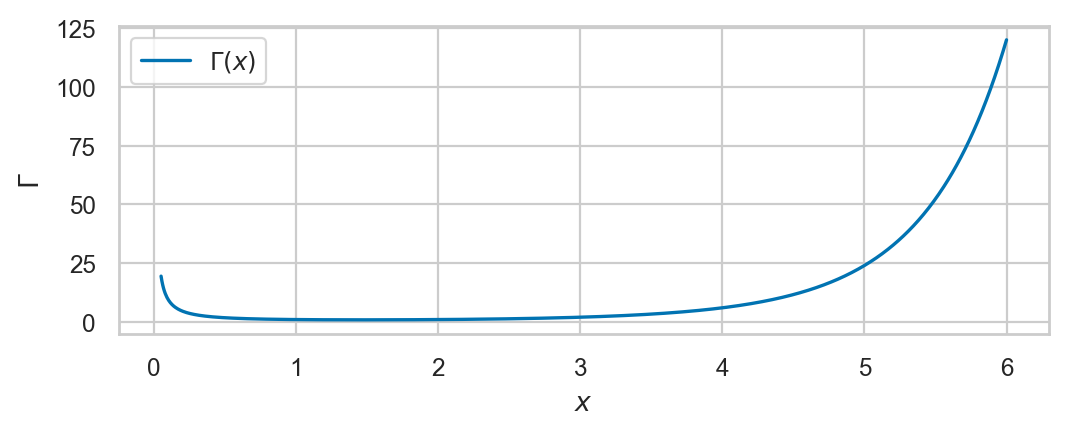

In [50]:
# plot gammaf between 0 and 5
xs = np.linspace(0.05, 6, 1000)
fXs = gammaf(xs)

ax = sns.lineplot(x=xs, y=fXs, label="$\\Gamma(x)$")
ax.set_xlabel("$x$")
ax.set_ylabel(r"$\Gamma$")

## Student's t-distribution

This is a generalization of the standard normal with "heavy" tails.

In [51]:
from scipy.stats import t as tdist

rvT = tdist(df=10)

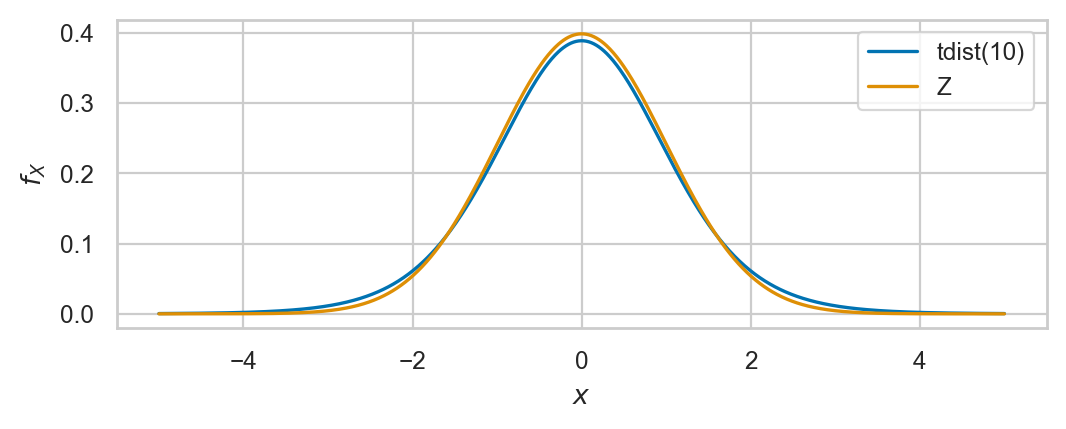

In [52]:
ax = plot_pdf(rvT, xlims=[-5,5], label=f"tdist(10)")
plot_pdf(rvZ, xlims=[-5,5], ax=ax, label="Z");

In [53]:
rvT.mean(), rvT.var()

(0.0, 1.25)

In [54]:
# Kurtosis formula  kurt(rvT) = 6/(df-4) for df>4
rvT.stats("k")

1.0

In [55]:
rvT.cdf(-2.3)

0.022127156642143552

In [56]:
rvT.ppf(0.05), rvT.ppf(0.95)

(-1.8124611228107341, 1.8124611228107335)

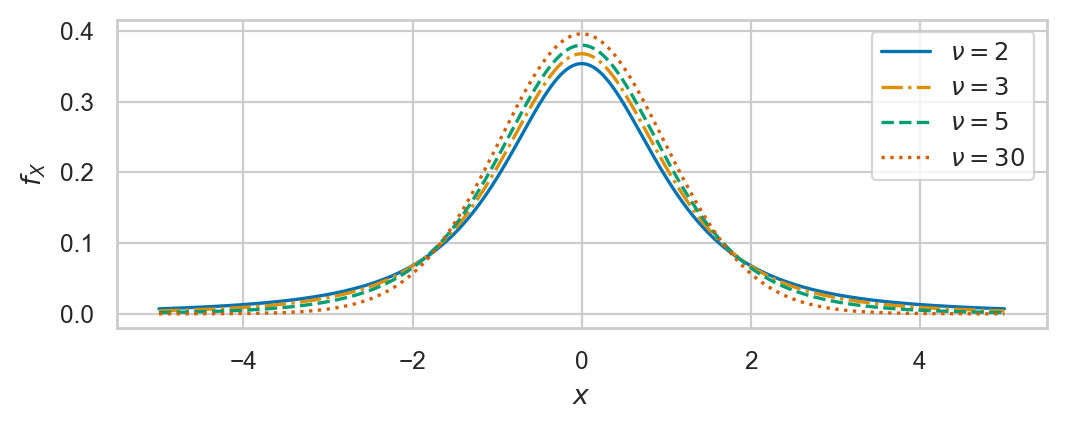

In [57]:
fig, ax = plt.subplots()

linestyles = ['solid', 'dashdot', 'dashed', 'dotted']

for i, df in enumerate([2,3,5,30]):
    rvT = tdist(df)
    linestyle = linestyles[i]
    plot_pdf(rvT, xlims=[-5,5], ax=ax, label="$\\nu={}$".format(df), linestyle=linestyle)

## Fisher–Snedecor's F-distribution

In [58]:
from scipy.stats import f as fdist

df1, df2 = 15, 10
rvF = fdist(df1, df2)

In [59]:
rvF.mean(), rvF.var()

(1.25, 0.7986111111111112)

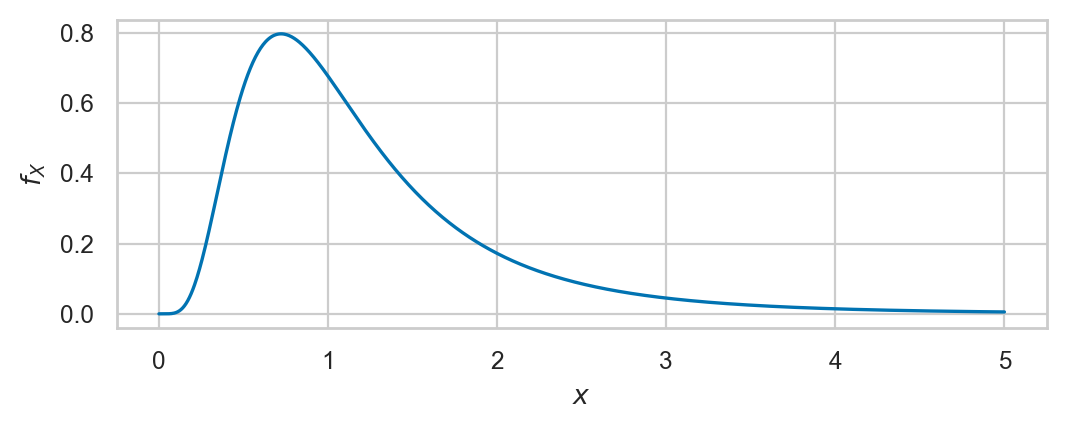

In [60]:
plot_pdf(rvF, xlims=[0,5]);

## Chi-squared distribution

In [61]:
from scipy.stats import chi2

df = 10
rvX2 = chi2(df)

In [62]:
rvX2.mean(), rvX2.var()

(10.0, 20.0)

In [63]:
1 - rvX2.cdf(20)

0.02925268807696113

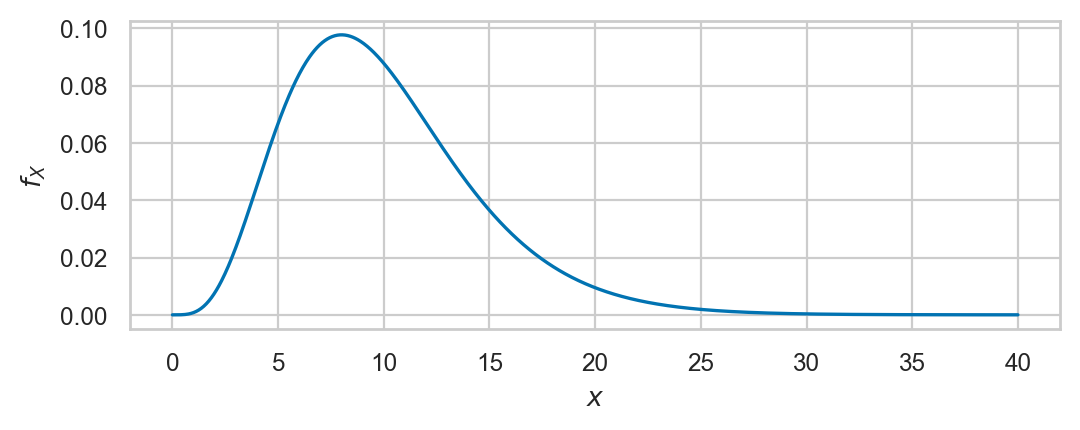

In [64]:
plot_pdf(rvX2, xlims=[0,40]);

## Gamma distribution

https://en.wikipedia.org/wiki/Gamma_distribution

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html

In [65]:
from scipy.stats import gamma as gammadist

alpha = 4
loc = 0
lam = 2
beta = 1/lam

rvG = gammadist(alpha, loc, beta)

In [66]:
rvG.mean(), rvG.var()

(2.0, 1.0)

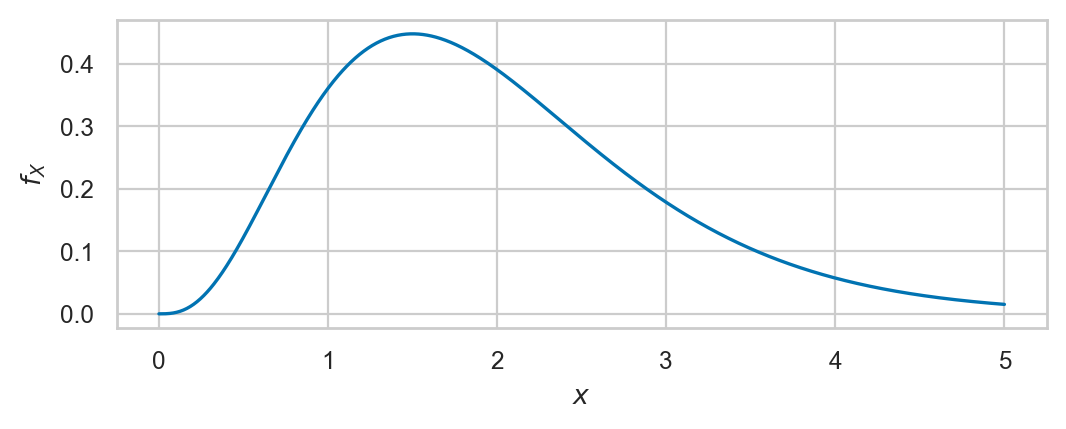

In [67]:
plot_pdf(rvG, xlims=[0,5]);

## Beta distribution

In [68]:
from scipy.stats import beta as betadist

alpha = 3
beta = 7

rvB = betadist(alpha, beta)

In [69]:
rvB.mean(), rvB.var()

(0.3, 0.019090909090909092)

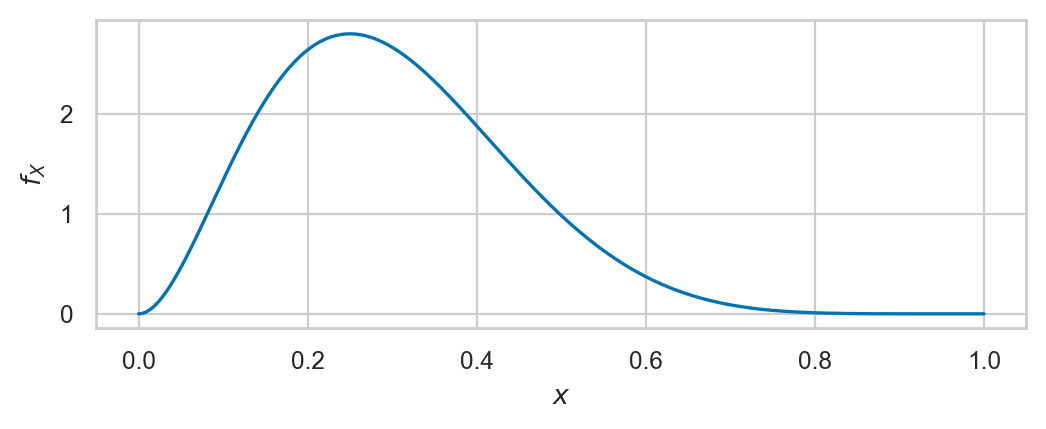

In [70]:
plot_pdf(rvB, xlims=[0,1]);

## Laplace distribution

In [71]:
from scipy.stats import laplace

mu = 10
b = 3
rvL = laplace(mu, b)

In [72]:
rvL.mean(), rvL.var()

(10.0, 18.0)

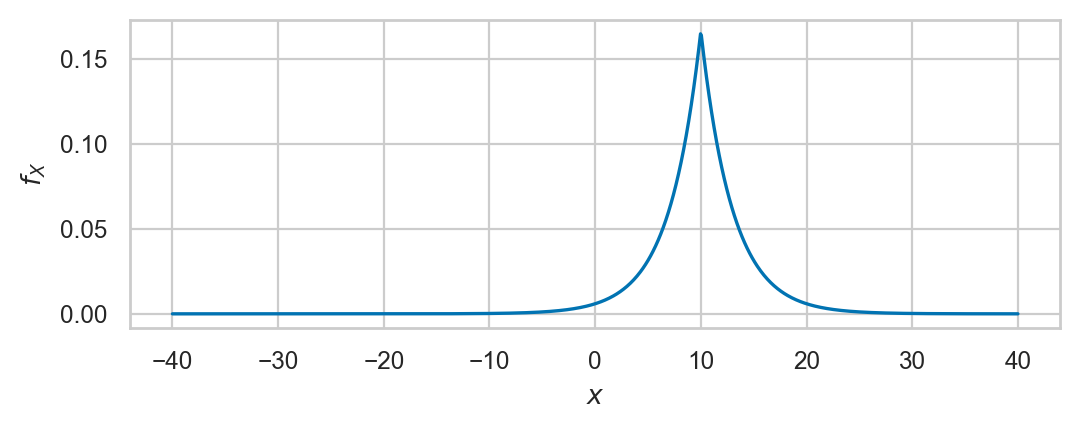

In [73]:
plot_pdf(rvL, xlims=[-40,40]);

## Explanations

### Location-scale families

#### Normal location-scale family example

##### Exam question 1: 

In [74]:
b = 109

muN = 100
sigmaN = 5

# standardize b 
z_b = (b - muN) / sigmaN
z_b

1.8

In [75]:
from scipy.stats import norm

rvZ = norm(loc=0, scale=1)
1 - rvZ.cdf(z_b)

0.03593031911292577

##### Exam question 2: 

In [76]:
z_l = rvZ.ppf(0.05)
z_u = rvZ.ppf(0.95)
[sigmaN*z_l + muN, sigmaN*z_u + muN]

[91.77573186524263, 108.22426813475735]

##### Equivalent calculations using "custom" model

In [77]:
b = 109

rvN = norm(loc=100, scale=5)
1 - rvN.cdf(b)

0.03593031911292577

In [78]:
[rvN.ppf(0.05), rvN.ppf(0.95)]

[91.77573186524263, 108.22426813475735]

#### Student's t location-scale family

In [79]:
b = 109

locS = 100
scaleS = 5

t_b = (b - locS) / scaleS
t_b

1.8

In [80]:
from scipy.stats import t as tdist

rvT = tdist(df=6, loc=0, scale=1)
1 - rvT.cdf(t_b)

0.06097621069194392

##### Equivalent calculations using "custom" model

In [81]:
rvS = tdist(df=6, loc=100, scale=5)

1 - rvS.cdf(b)

0.06097621069194392

#### Uniform location-scale family

In [82]:
locV = 100
scaleV = 20

b = 115
u_b = (b - locV) / scaleV
u_b

0.75

In [83]:
from scipy.stats import uniform

rvU = uniform(0, 1)
1 - rvU.cdf(u_b)

0.25

In [84]:
rvV = uniform(100, 20)
1 - rvV.cdf(115)

0.25

#### Chi-square scale family

In [85]:
scaleS = 10

b = 150
q_b = 150 / scaleS

from scipy.stats import chi2
rvQ = chi2(df=7)
1 - rvQ.cdf(q_b)

0.03599940476342878

In [86]:
rvS = chi2(df=7, scale=10)

1 - rvS.cdf(150)

0.03599940476342878

## Discussion

### Relations between distributions

## Exercises

## Links